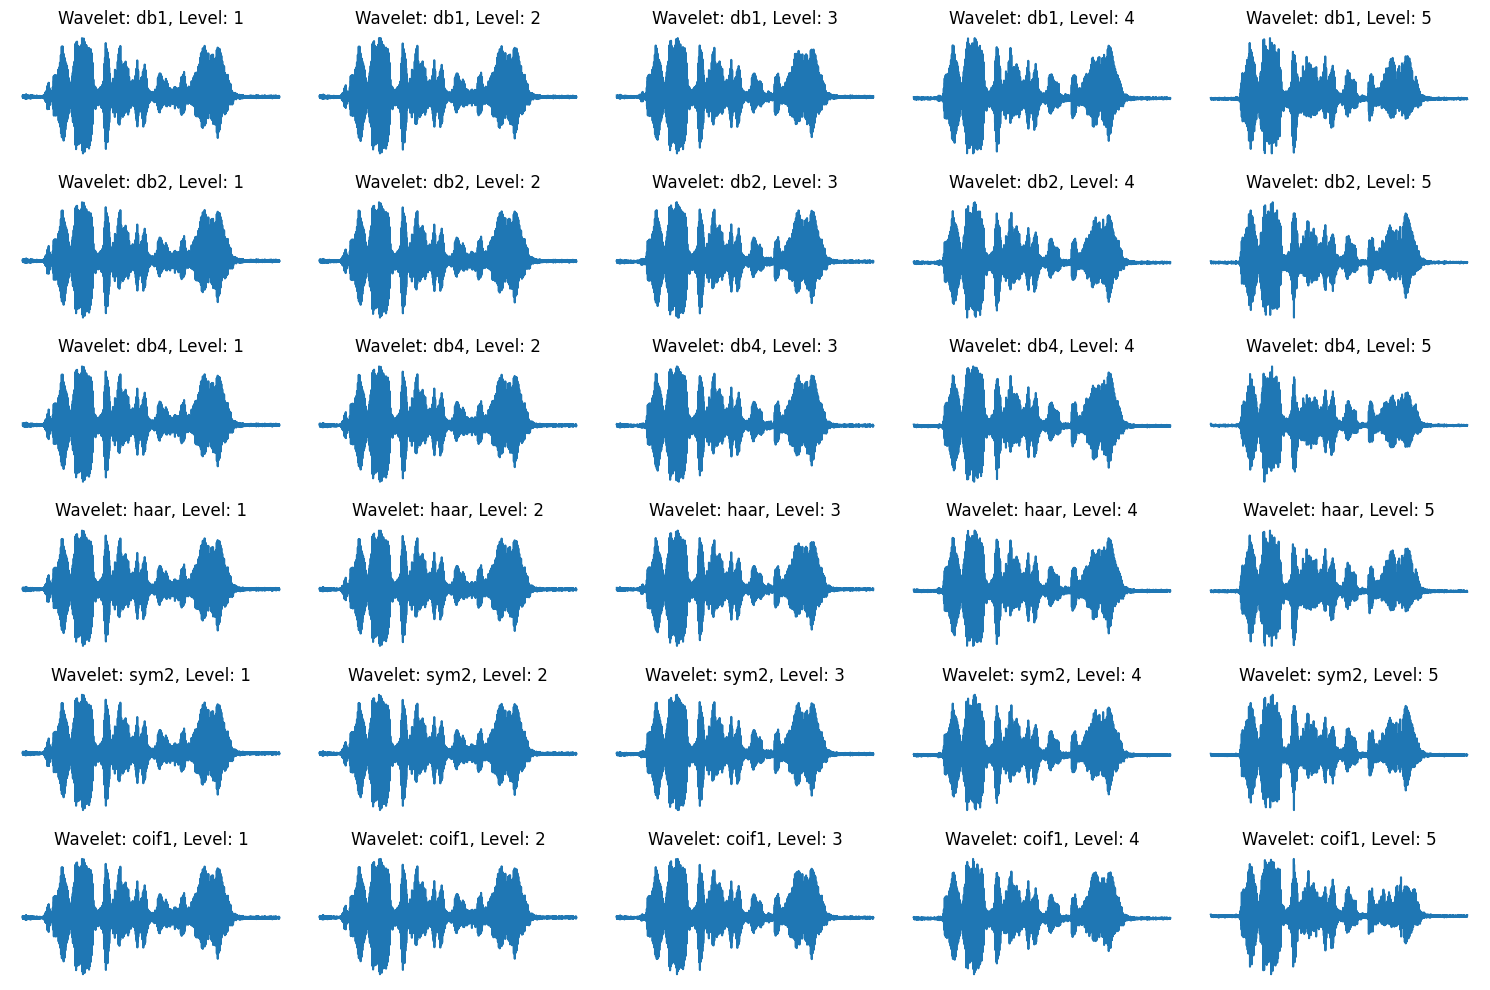

In [ ]:
import pywt
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
file_path = "./Data/speech_1.wav"  
audio, sr = librosa.load(file_path, sr=None)

# Define wavelet types and decomposition levels
wavelet_types = ['db1', 'db2', 'db4', 'haar', 'sym2', 'coif1']
decomposition_levels = [1, 2, 3, 4, 5]

# Iterate through combinations of wavelet types and decomposition levels
plt.figure(figsize=(15, 10))
plot_index = 1
for wavelet in wavelet_types:
    for level in decomposition_levels:
        # Perform wavelet transform
        coeffs = pywt.wavedec(audio, wavelet=wavelet, level=level)
        timbre_features = coeffs[0]  # Approximation coefficients represent timbre

        # Plot the results
        plt.subplot(len(wavelet_types), len(decomposition_levels), plot_index)
        plt.plot(timbre_features)
        plt.title(f"Wavelet: {wavelet}, Level: {level}")
        plt.axis('off')  # Optional: Remove axes for cleaner visualization
        plot_index += 1

plt.tight_layout()
plt.show()

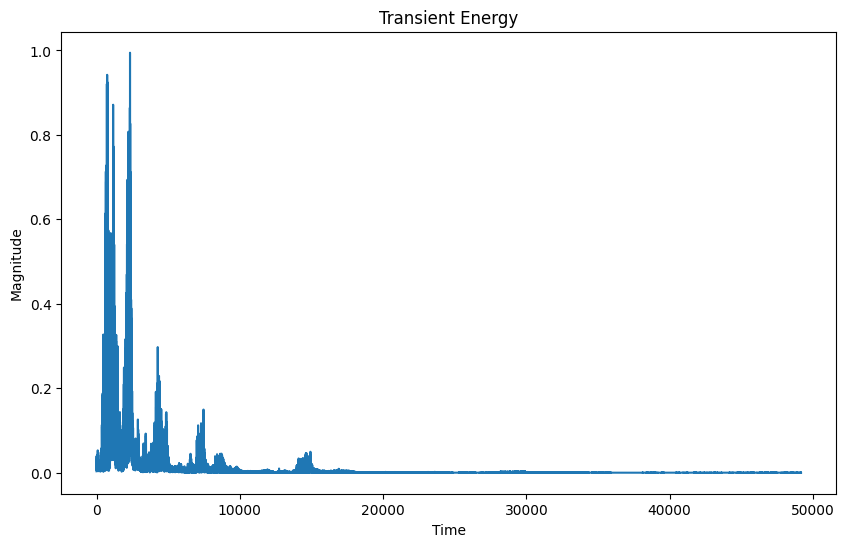

In [ ]:
import pywt
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
file_path = "./Data/speech_1.wav"  
audio, sr = librosa.load(file_path, sr=None)

# Perform wavelet transform
wavelet = 'db4'  
level = 5  
coeffs = pywt.wavedec(audio, wavelet=wavelet, level=level)

# Extract detail coefficients (high-frequency components)
detail_coeffs = coeffs[1:]  # Skip approximation coefficients

# Pad detail coefficients to the same length before summing
max_len = max([len(detail) for detail in detail_coeffs])
padded_details = np.array([np.pad(np.abs(detail), (0, max_len - len(detail)), mode='constant') for detail in detail_coeffs])
transient_energy = np.sum(padded_details, axis=0)

# Plot the transient energy
plt.figure(figsize=(10, 6))
plt.plot(transient_energy)
plt.title("Transient Energy")
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.show()

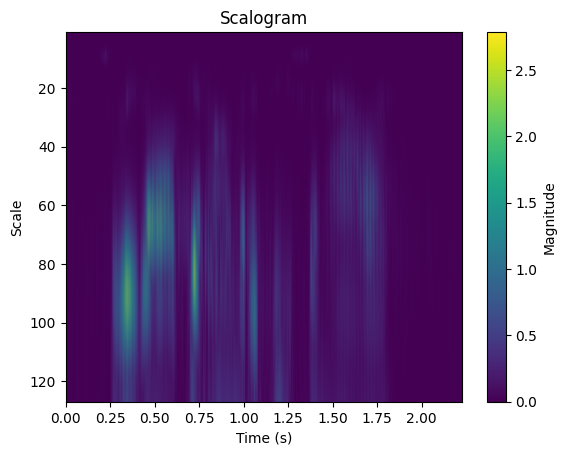

In [6]:
import pywt
import matplotlib.pyplot as plt

# Perform Continuous Wavelet Transform (CWT)
scales = np.arange(1, 128)
coefficients, frequencies = pywt.cwt(audio, scales, 'morl')

# Plot scalogram
plt.imshow(np.abs(coefficients), aspect='auto', extent=[0, len(audio)/sr, scales[-1], scales[0]])
plt.title("Scalogram")
plt.xlabel("Time (s)")
plt.ylabel("Scale")
plt.colorbar(label="Magnitude")
plt.show()

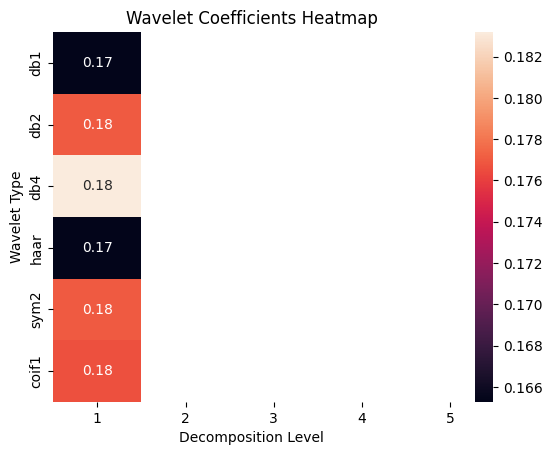

In [8]:
import seaborn as sns

# Generate a matrix of coefficients for visualization
coeff_matrix = np.array([np.mean(np.abs(pywt.wavedec(audio, wavelet, level=5)[0])) for wavelet in wavelet_types])

# Plot heatmap
sns.heatmap(coeff_matrix.reshape(len(wavelet_types), -1), annot=True, xticklabels=decomposition_levels, yticklabels=wavelet_types)
plt.title("Wavelet Coefficients Heatmap")
plt.xlabel("Decomposition Level")
plt.ylabel("Wavelet Type")
plt.show()

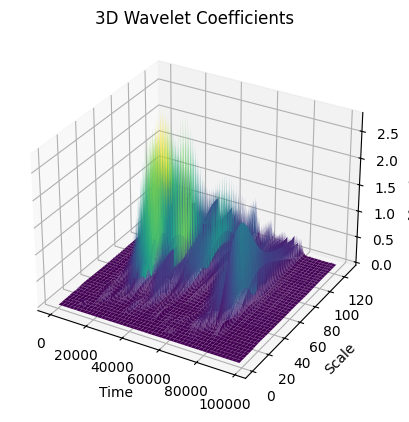

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(np.arange(len(audio)), scales)
ax.plot_surface(X, Y, np.abs(coefficients), cmap='viridis')
ax.set_title("3D Wavelet Coefficients")
ax.set_xlabel("Time")
ax.set_ylabel("Scale")
ax.set_zlabel("Magnitude")
plt.show()

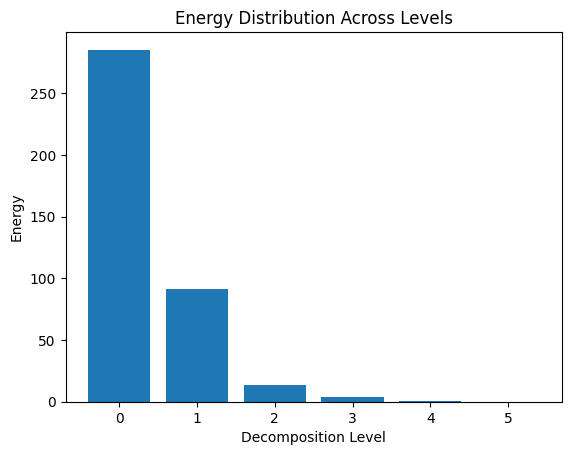

In [10]:
energies = [np.sum(np.square(coeff)) for coeff in coeffs]
plt.bar(range(len(energies)), energies)
plt.title("Energy Distribution Across Levels")
plt.xlabel("Decomposition Level")
plt.ylabel("Energy")
plt.show()

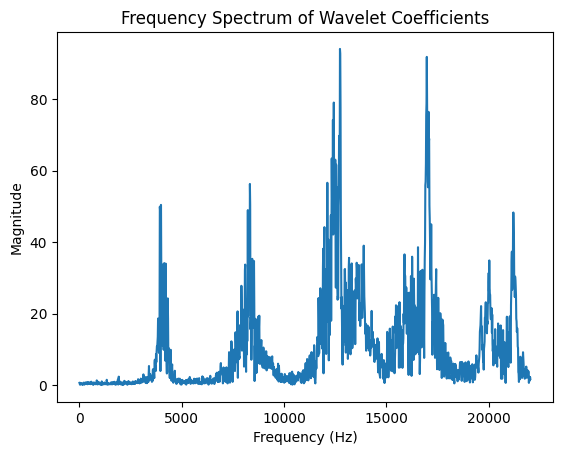

In [11]:
from scipy.fftpack import fft

# Compute FFT of approximation coefficients
fft_coeffs = fft(timbre_features)
freqs = np.fft.fftfreq(len(fft_coeffs), d=1/sr)

# Plot frequency spectrum
plt.plot(freqs[:len(freqs)//2], np.abs(fft_coeffs[:len(fft_coeffs)//2]))
plt.title("Frequency Spectrum of Wavelet Coefficients")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()